# Master Thesis Work - Saurav Bhowmick

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Importing and working with manual data

Trigger time = 0.39039999999999997s
Trigger time = 2024-10-04 05:39:59.635529s


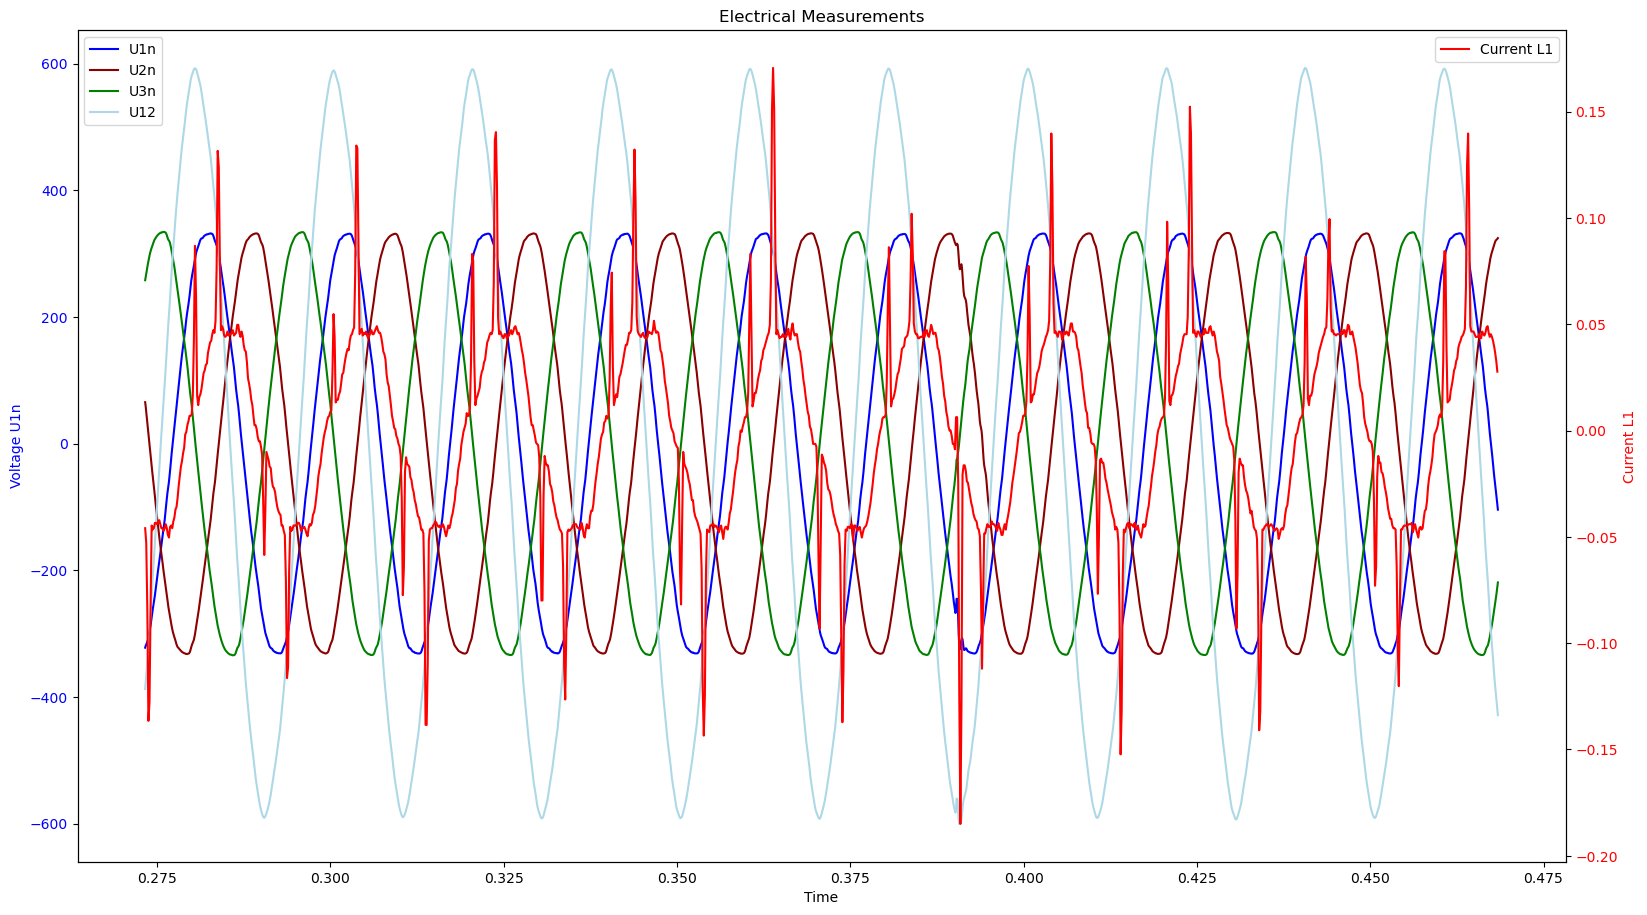

In [ ]:
import matplotlib.pyplot as plt
import comtrade
import numpy as np

start_time =3500
stop_time = 6000
phase=1

# Load the COMTRADE data
rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20241004T053959635_8095_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20241004T053959635_8095_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240918T025053314_32890_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240918T025053314_32890_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240917T220621006_32889_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240917T220621006_32889_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240917T204452190_32888_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240917T204452190_32888_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240917T203711084_32887_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240917T203711084_32887_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T205628503_32886_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T205628503_32886_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T204559868_32885_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T204559868_32885_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T204244671_32884_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T204244671_32884_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T204008636_32883_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T204008636_32883_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T043945869_32881_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T043945869_32881_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T040312657_32880_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T040312657_32880_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T035937180_32879_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T035937180_32879_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T034024564_32878_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T034024564_32878_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T033539085_32877_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T033539085_32877_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T033512822_32876_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T033512822_32876_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T032714100_32875_t.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240916T032714100_32875_t.dat")
#rec = comtrade.load(r"C:\Users\saurav\Masters Thesis\Comtrade files\20240819T015138780_32318_te.cfg", r"C:\Users\saurav\Masters Thesis\Comtrade files\20240819T015138780_32318_te.dat")


print("Trigger time = {}s".format(rec.trigger_time))
print("Trigger time = {}s".format(rec.trigger_timestamp))

# Assume 'data' and 'time' are numpy arrays for the first dataset
data = np.array(rec.analog[phase+5][start_time:stop_time])
time = np.array(rec.time[start_time:stop_time])

# Filter out NaN values from the first dataset
valid_indices = ~np.isnan(data)
filtered_data = data[valid_indices]
filtered_time = time[valid_indices]

# Set the dimensions and DPI
width_in_inches = 1920 / 100
height_in_inches = 1080 / 100

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=100)

# Plot the second curve on the primary axis
ax1.plot(rec.time[start_time:stop_time], rec.analog[phase-1][start_time:stop_time], label='U1n', color='blue')
ax1.plot(rec.time[start_time:stop_time], rec.analog[phase][start_time:stop_time], label='U2n', color='darkred')
ax1.plot(rec.time[start_time:stop_time], rec.analog[phase+1][start_time:stop_time], label='U3n', color='green')
ax1.plot(rec.time[start_time:stop_time], rec.analog[phase+3-1][start_time:stop_time], label='U12', color='lightblue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Voltage U1n', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(filtered_time, filtered_data, label='Current L1', color='red')
ax2.set_ylabel('Current L1', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Electrical Measurements')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


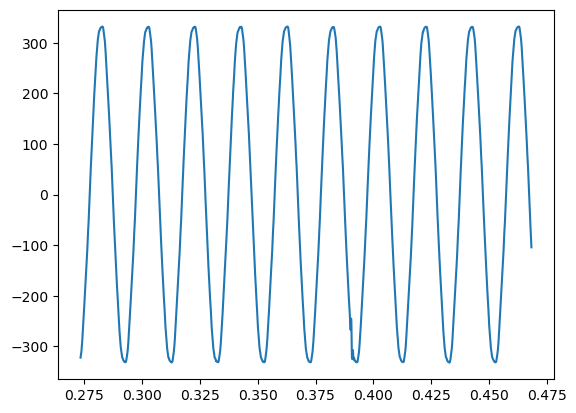

In [ ]:
plt.plot(rec.time[start_time:stop_time], rec.analog[phase-1][start_time:stop_time])

#### Cross-Correlation

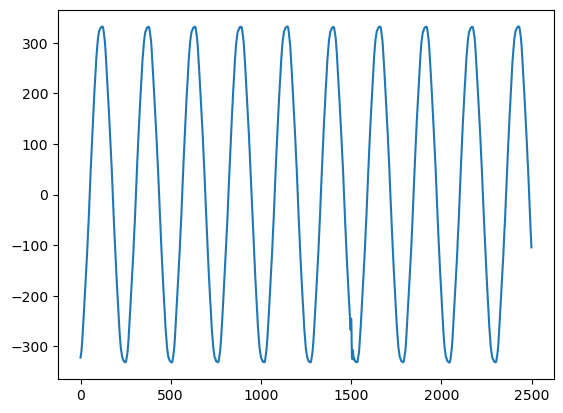

In [ ]:
plt.plot(rec.analog[phase-1][start_time:stop_time])

Comment: We are seeing where the transient is.

In [ ]:
voltage = rec.analog[phase-1][start_time:stop_time]
voltage1 = voltage[:400]
voltage2 = voltage[1290:1690]

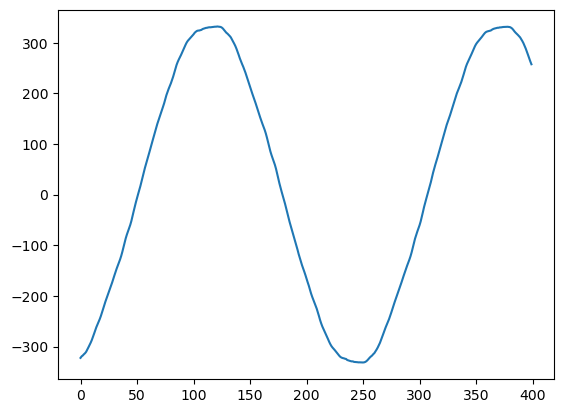

In [ ]:
plt.plot(voltage1)

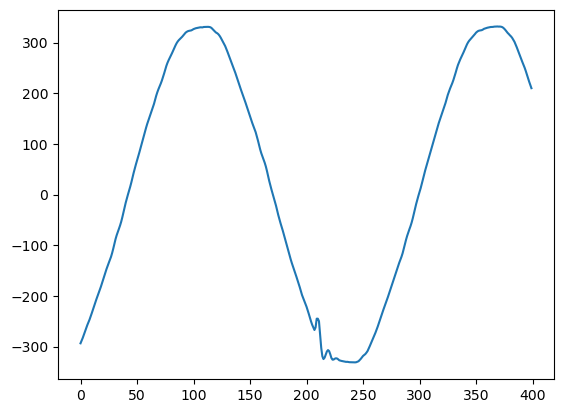

In [ ]:
plt.plot(voltage2)

In [ ]:
# Assuming current1 and current2 are your two waveforms (NumPy arrays)
correlation_matrix = np.corrcoef(voltage1, voltage2)

# Extract the correlation coefficient from the matrix
correlation_coefficient = correlation_matrix[0, 1]

# Print the result rounded to one decimal place
print(f'Correlation coefficient: {correlation_coefficient}')
print(f'Correlation coefficient (rounded): {round(correlation_coefficient, 1)}')

Correlation coefficient: 0.9802788806571503
Correlation coefficient (rounded): 1.0


#### Curve fitting

At time 0.278 s, dominant frequency: 100.055 Hz, amplitude: 275.246
At time 0.288 s, dominant frequency: 100.055 Hz, amplitude: 274.538
At time 0.298 s, dominant frequency: 100.055 Hz, amplitude: 273.838
At time 0.308 s, dominant frequency: 100.055 Hz, amplitude: 274.119
At time 0.318 s, dominant frequency: 100.055 Hz, amplitude: 275.397
At time 0.328 s, dominant frequency: 100.055 Hz, amplitude: 276.119
At time 0.338 s, dominant frequency: 100.055 Hz, amplitude: 275.396
At time 0.348 s, dominant frequency: 100.055 Hz, amplitude: 275.751
At time 0.358 s, dominant frequency: 100.055 Hz, amplitude: 276.105
At time 0.368 s, dominant frequency: 100.055 Hz, amplitude: 276.727
At time 0.378 s, dominant frequency: 100.055 Hz, amplitude: 276.859
At time 0.388 s, dominant frequency: 100.055 Hz, amplitude: 274.469
At time 0.398 s, dominant frequency: 100.055 Hz, amplitude: 277.464
At time 0.408 s, dominant frequency: 100.055 Hz, amplitude: 277.871
At time 0.418 s, dominant frequency: 100.055 Hz,

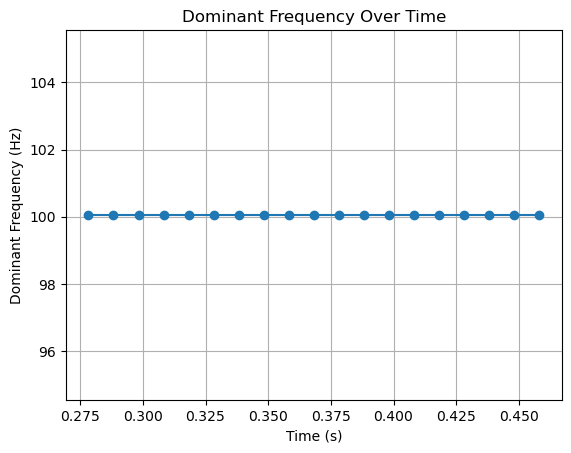

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def segment_and_fft(time, data, segment_duration=0.02):
    # Convert inputs to NumPy arrays if they aren't already
    time = np.asarray(time)
    data = np.asarray(data)

    # Remove NaN values and corresponding times
    mask = ~np.isnan(data)
    clean_time = time[mask]
    clean_data = data[mask]

    # Calculate the number of samples per segment
    sample_spacing = np.mean(np.diff(clean_time))  # Sample interval (Δt)
    samples_per_segment = int(segment_duration / sample_spacing)  # Number of samples per segment

    segments = []
    for start in range(0, len(clean_time), samples_per_segment):
        end = start + samples_per_segment
        if end > len(clean_time):
            break

        segment_time = clean_time[start:end]
        segment_data = clean_data[start:end]

        # Perform FFT using numpy
        yf = np.fft.fft(segment_data)
        xf = np.fft.fftfreq(len(segment_time), sample_spacing)

        # Calculate the correct amplitude
        amplitude = 2 * np.abs(yf) / len(segment_time)

        # Keep only the positive frequencies
        pos_mask = xf > 0
        xf = xf[pos_mask]
        amplitude = amplitude[pos_mask]

        # Find the dominant frequency (frequency with the highest amplitude)
        dominant_frequency = xf[np.argmax(amplitude)]
        dominant_amplitude = np.max(amplitude)

        # Center time of the segment
        center_time = segment_time[len(segment_time) // 2]

        # Append segment result (center_time, dominant_frequency, dominant_amplitude)
        segments.append((center_time, dominant_frequency, dominant_amplitude))

    return segments

# Generate time and sine wave data
time = time
data = voltage

# Call the segment_and_fft function
segments = segment_and_fft(time, data, segment_duration=0.01)  # Use 0.01s segment duration

# Display the dominant frequency for each segment
for segment in segments:
    center_time, dominant_frequency, dominant_amplitude = segment
    print(f"At time {center_time:.3f} s, dominant frequency: {dominant_frequency:.3f} Hz, amplitude: {dominant_amplitude:.3f}")

# Optional: Plot the dominant frequency over time
times = [segment[0] for segment in segments]
dominant_frequencies = [segment[1] for segment in segments]
plt.plot(times, dominant_frequencies, marker='o')
plt.title("Dominant Frequency Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Dominant Frequency (Hz)")
plt.grid(True)
plt.show()


In [ ]:
import math

# Given values
y = 275.246  # Instantaneous y value
A = 275.246    # Amplitude (A)
omega = 2 * math.pi * 100.055  # Angular frequency (in radians per second)
t = 0.298    # Time (t)

# Solve for phi
phi = math.asin(y / A) - omega * t

# Print the phase (phi) in radians
print(f"Phase (phi): {phi} radians")


Phase (phi): -185.77110723434146 radians


Comment: For more details, we will see the fft segmentation graph.

Trigger time = 0.39039999999999997s
Trigger time = 2024-10-04 05:39:59.635529s
JSON file C:\Users\saurav\Masters Thesis\Comtrade files\20241004T053959635_8095_t.json created successfully
                      t_stamp      time       data0       data1      data2  \
0  2024-10-04T05:39:59.245129  0.000000  270.888489 -316.357483  45.149044   
1  2024-10-04T05:39:59.245207  0.000078  275.634979 -314.324677  35.915939   
2  2024-10-04T05:39:59.245285  0.000156  280.381439 -311.783630  27.275784   
3  2024-10-04T05:39:59.245363  0.000234  285.806000 -308.226196  19.228580   
4  2024-10-04T05:39:59.245441  0.000312  290.976288 -303.652374  10.757840   

        data3       data4       data5     data6     data7     data8     data9  \
0  587.242676 -361.471039 -225.729446  0.014473 -0.043618  0.033669  0.000624   
1  589.944031 -350.201447 -239.700363       NaN       NaN       NaN       NaN   
2  592.138855 -339.058472 -253.080368  0.036497 -0.068542  0.031798  0.000624   
3  593.995972 -327.4

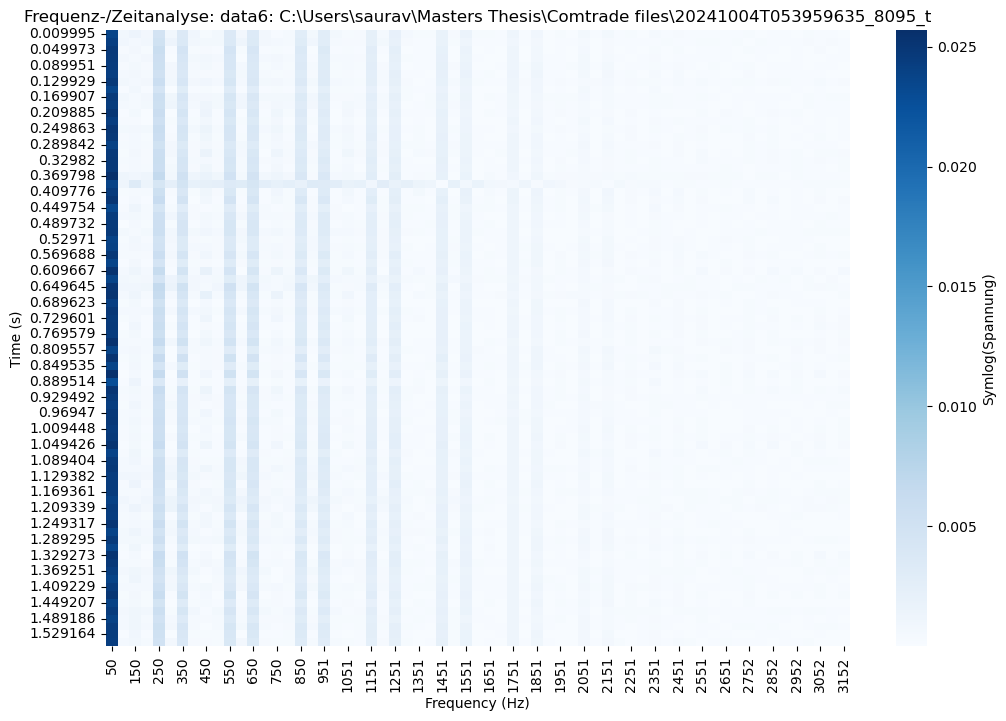

In [ ]:
import comtrade
import json
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

def create_json_from_rec(rec, filename):
    global json_data  # Declare json_data as global
    # Create the top-level structure of the JSON
    json_data = {
        "id": filename,
        "start_timestamp": rec.start_timestamp.isoformat(),
        "trigger_timestamp": rec.trigger_timestamp.isoformat(),
        "trigger_time": rec.trigger_time,
        "analog_phases": rec.analog_phases,
        "t_stamp": [],
        "time": rec.time.tolist(),  # Convert numpy array to list
        "data": {}
    }

    # Create the absolute timestamp array in microseconds
    for time in rec.time:
        t_stamp = rec.start_timestamp + timedelta(seconds=time)
        json_data["t_stamp"].append(t_stamp.isoformat())

    # Add analog data arrays to the JSON
    for i in range(len(rec.analog)):
        json_data["data"][f"data{i}"] = rec.analog[i].tolist()

    # Save to a JSON file
    json_filename = filename + ".json"
    with open(json_filename, 'w') as json_file:
        json.dump(json_data, json_file, indent=4)

    print(f"JSON file {json_filename} created successfully")
    return json_data

def create_dataframe_from_rec(rec):
    global df  # Declare df as global
    # Create a dictionary for DataFrame creation
    data_dict = {
        "t_stamp": [],
        "time": rec.time.tolist()
    }

    # Add analog data arrays to the dictionary
    for i in range(len(rec.analog)):
        data_dict[f"data{i}"] = rec.analog[i].tolist()

    # Create the absolute timestamp array in microseconds
    for time in rec.time:
        t_stamp = rec.start_timestamp + timedelta(seconds=time)
        data_dict["t_stamp"].append(t_stamp.isoformat())

    # Create a DataFrame
    df = pd.DataFrame(data_dict)

    return df

def save_dataframe_to_csv(df, filename):
    csv_filename = filename + ".csv"
    df.to_csv(csv_filename, index=False)
    print(f"CSV file {csv_filename} created successfully")

def segment_and_fft(time, data, segment_duration=0.02):
    # Remove NaN values and corresponding times
    clean_time = time[~np.isnan(data)]
    clean_data = data[~np.isnan(data)]

    # Calculate the number of samples per segment
    sample_spacing = np.mean(np.diff(clean_time))
    samples_per_segment = int(segment_duration / sample_spacing)

    segments = []
    for start in range(0, len(clean_time), samples_per_segment):
        end = start + samples_per_segment
        if end > len(clean_time):
            break
        segment_time = clean_time[start:end]
        segment_data = clean_data[start:end]

        # Perform FFT using numpy
        yf = np.fft.fft(segment_data)
        xf = np.fft.fftfreq(len(segment_time), sample_spacing)

        # Calculate the correct amplitude
        amplitude = 2 * np.abs(yf) / len(segment_time)

        # Keep only the positive frequencies
        pos_mask = xf > 0
        xf = xf[pos_mask]
        amplitude = amplitude[pos_mask]

        # Center time of the segment
        center_time = segment_time[len(segment_time) // 2]

        segments.append((center_time, xf, amplitude))

    return segments

def save_segments_to_csv(segments, filename):
    rows = []
    for center_time, xf, amplitude in segments:
        for freq, amp in zip(xf, amplitude):
            rows.append([center_time, freq, amp])

    df_segments = pd.DataFrame(rows, columns=['center_time', 'frequency', 'amplitude'])
    csv_filename = filename + "_segments.csv"
    df_segments.to_csv(csv_filename, index=False)
    print(f"CSV file {csv_filename} created successfully")
    return df_segments

def plot_heatmap(df_segments, filename):
    # Round the frequency to integer
    df_segments['frequency'] = df_segments['frequency'].round().astype(int)
    df_segments['center_time'] = df_segments['center_time'].round(6)

    # Create a pivot table for the heatmap
    pivot_table = df_segments.pivot(index="center_time", columns="frequency", values="amplitude")

    # Apply symlog transformation to amplitude
    pivot_table = np.sign(pivot_table) * np.log10(np.abs(pivot_table) + 1)
    pivot_table.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf and -inf with NaN
    pivot_table.dropna(how='all', axis=1, inplace=True)  # Drop columns where all values are NaN

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, cmap="Blues", cbar_kws={'label': 'Symlog(Spannung)'})
    plt.title('Frequenz-/Zeitanalyse: ' + filename)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Time (s)')
    plt.show()

def main():
    global rec, df  # Declare rec and df as global
    # Filename without the extension
    filename = r'C:\Users\saurav\Masters Thesis\Comtrade files\20241004T053959635_8095_t'
    # Uncomment and use the correct filename as needed
    #filename = '20240621T032116838_31666_t'
    #filename = '20240623T024500611_31668_e'
    #filename='20240625T131515756_1797_t'
    #filename="20240520T194504924_31438_t"
    #filename='20240629T022426031_1825_t'
    series = 'data6'

    # Decode the COMTRADE files
    rec = comtrade.load(filename + ".cfg", filename + ".dat")
    print("Trigger time = {}s".format(rec.trigger_time))
    print("Trigger time = {}s".format(rec.trigger_timestamp))

    # Create JSON from the rec object
    create_json_from_rec(rec, filename)

    # Create DataFrame from the rec object
    df = create_dataframe_from_rec(rec)
    print(df.head())  # Print the first few rows of the DataFrame

    # Optionally save DataFrame to a CSV file
    save_dataframe_to_csv(df, filename)

    # Perform segmentation and FFT on the time and data0 series
    segments = segment_and_fft(df['time'].values, df[series].values)

    # Save the segmented FFT results to a CSV file
    df_segments = save_segments_to_csv(segments, filename)

    # Plot the heatmap
    plot_heatmap(df_segments, series+': '+filename)

if __name__ == "__main__":
    main()



Comment: Here, we will decide the frequency, amplitude and phase shift that will come in the initial guess.

Time data shape: (2500,)
Voltage data shape: (2500,)
Adjusted time data shape: (2500,)
Adjusted voltage data shape: (2500,)
Fitted Amplitude (A): 336.15611527485737
Fitted Angular Frequency (ω): 313.8294358249669
Fitted Phase Shift (φ): -187.530259875691


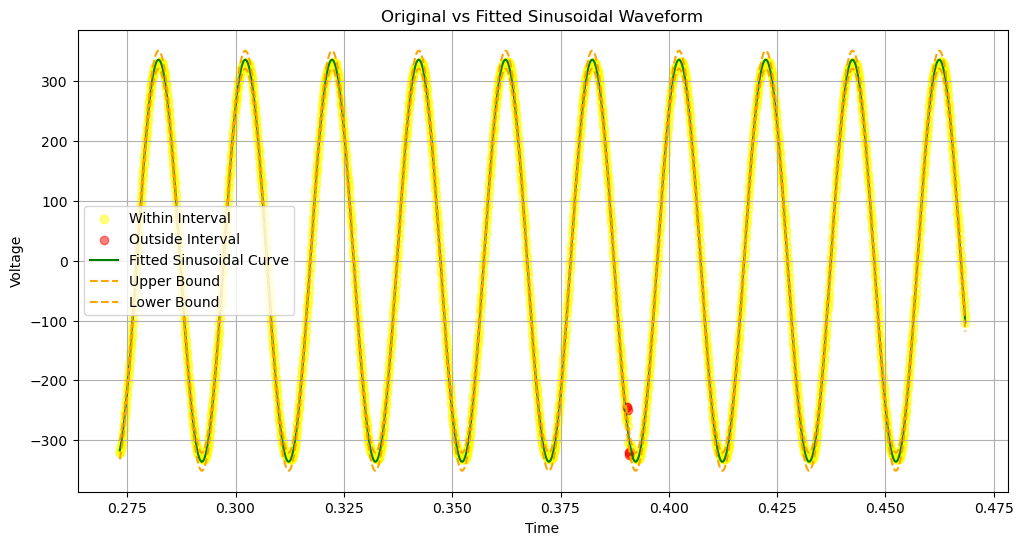

Fitted Frequency: 49.95 Hz


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def sinusoidal_wave(t, A, omega, phi):
    return A * np.sin(omega * t + phi)

# Convert data to numpy arrays and print diagnostic information
time_data = np.array(time)
voltage_data = np.array(voltage)
print(f"Time data shape: {time_data.shape}")
print(f"Voltage data shape: {voltage_data.shape}")

# Ensure the arrays have the same length
min_length = min(len(time_data), len(voltage_data))
time_data = time_data[:min_length]
voltage_data = voltage_data[:min_length]
print(f"Adjusted time data shape: {time_data.shape}")
print(f"Adjusted voltage data shape: {voltage_data.shape}")

# Initial guess for the parameters [A, omega, phi]
initial_guess = [275.246, 2 * np.pi * 50, -185.77110723434146]

# Curve fitting to the sinusoidal model
try:
    params, params_covariance = curve_fit(sinusoidal_wave, time_data, voltage_data, p0=initial_guess)

    # Extract fitted parameters
    A_fitted, omega_fitted, phi_fitted = params

    print(f"Fitted Amplitude (A): {A_fitted}")
    print(f"Fitted Angular Frequency (ω): {omega_fitted}")
    print(f"Fitted Phase Shift (φ): {phi_fitted}")

    # Generate the fitted curve
    fitted_voltage_data = sinusoidal_wave(time_data, A_fitted, omega_fitted, phi_fitted)

    # Calculate confidence interval (you may need to adjust this based on your specific needs)
    confidence_interval = 15  # This is an example value, adjust as needed
    upper_bound = fitted_voltage_data + confidence_interval
    lower_bound = fitted_voltage_data - confidence_interval

    # Determine which points are within the confidence interval
    within_interval = (voltage_data >= lower_bound) & (voltage_data <= upper_bound)

    # Plot original data vs fitted curve
    plt.figure(figsize=(12, 6))
    plt.scatter(time_data[within_interval], voltage_data[within_interval], color='yellow', label='Within Interval', alpha=0.5)
    plt.scatter(time_data[~within_interval], voltage_data[~within_interval], color='red', label='Outside Interval', alpha=0.5)
    plt.plot(time_data, fitted_voltage_data, label='Fitted Sinusoidal Curve', color='green')
    plt.plot(time_data, upper_bound, label='Upper Bound', linestyle='--', color='orange')
    plt.plot(time_data, lower_bound, label='Lower Bound', linestyle='--', color='orange')
    plt.title('Original vs Fitted Sinusoidal Waveform')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate and print the frequency in Hz
    frequency_hz = omega_fitted / (2 * np.pi)
    print(f"Fitted Frequency: {frequency_hz:.2f} Hz")
except Exception as e:
    print(f"An error occurred during curve fitting: {str(e)}")
    print("Please check your data and ensure it's suitable for sinusoidal fitting.")

##### Working with the data we have with comtrade and curve fitting

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['Time'] = time
df['Current'] = data

# Determine which points are within the confidence interval
within_interval = (voltage_data >= lower_bound) & (voltage_data <= upper_bound)

df['Transient or Normal'] = np.where(within_interval, 0, 1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
import plotly.express as px
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support as score, roc_curve
from sklearn.utils import compute_sample_weight
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')


In [ ]:
# Select features and target variable
features = df[['Time', 'Current']]
target = df['Transient or Normal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Using Balanced Random Forest
model = BalancedRandomForestClassifier(n_estimators=300, max_depth=7, sampling_strategy=0.1)
model.fit(X_train_scaled, y_train)


BalancedRandomForestClassifier(max_depth=7, n_estimators=300,
                               sampling_strategy=0.1)

In [ ]:
y_pred_brf = model.predict(X_test_scaled)

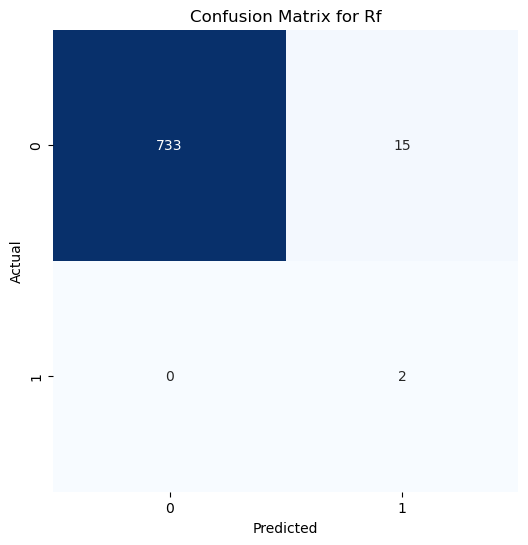

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix_brf = confusion_matrix(y_test, y_pred_brf)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_brf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Rf")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score,matthews_corrcoef

accuracy = accuracy_score(y_test, y_pred_brf)
recall = recall_score(y_test, y_pred_brf, average='weighted')
precision = precision_score(y_test, y_pred_brf, average='weighted',zero_division=False)
f1s = f1_score(y_test, y_pred_brf, average='weighted')
ROC_AUC = roc_auc_score(y_test, y_pred_brf, average='weighted')
MCC = matthews_corrcoef(y_test, y_pred_brf)


print("Balanced Random forest Results:")
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC_AUC: "+ "{:.2%}".format(ROC_AUC))
print("MCC: "+ "{:.2%}".format(MCC))

Balanced Random forest Results:
Accuracy: 98.00%
Recall: 98.00%
Precision: 99.76%
F1-Score: 98.78%
ROC_AUC: 99.00%
MCC: 33.95%


## Data collected from automation : RMS values

In [ ]:
files = [
    r"01_30d_schneider_umg801.csv",
    r"02_30d_schneider_umg801.csv",
    r"03_30d_schneider_umg801.csv",
    r"04_30d_schneider_umg801.csv",
    r"05_30d_schneider_umg801.csv",
    r"06_30d_schneider_umg801.csv",
    r"07_30d_schneider_umg801.csv"
]

list_data = [pd.read_csv(file) for file in files]
df_final_data = pd.concat(list_data)

In [ ]:
df_final_data

,_time,_measurement,AZEP,A_L1,A_L2,A_L3,A_N,COS_PHI_L1,COS_PHI_L2,COS_PHI_L3,THDI_L1,THDI_L2,THDI_L3,THDU_L1N,THDU_L2N,THDU_L3N
0,2024-06-01 00:00:00.773,umg801,2.979002,17.218197,10.907660,14.621468,10.908293,0.581785,0.908385,0.772339,25.645781,23.738079,34.770809,1.888530,2.041828,1.789424
1,2024-06-01 00:00:01.787,umg801,2.921212,17.321022,11.325423,15.232433,11.264262,0.561046,0.898510,0.742731,26.202259,25.422169,35.870781,2.097183,2.243149,1.912607
2,2024-06-01 00:00:02.777,umg801,2.894955,17.321356,11.299232,15.152749,11.162358,0.564678,0.897204,0.744348,25.993792,24.752419,35.055126,2.073061,2.206912,1.916426
3,2024-06-01 00:00:03.790,umg801,2.917001,17.275156,11.261413,15.202518,11.231280,0.561376,0.898842,0.745958,26.017517,25.301424,36.023998,2.048936,2.181324,1.848700
4,2024-06-01 00:00:04.783,umg801,2.866067,17.092211,11.275751,15.010605,11.043076,0.567188,0.902105,0.751172,26.306911,25.913025,35.515816,2.184645,2.331969,1.981677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257234,2024-12-12 23:58:55.929,umg801,17.511200,265.765381,264.393524,254.308228,23.393034,0.939086,0.943174,0.930257,24.209185,24.620564,24.182903,1.122054,1.210302,1.061012
1257235,2024-12-12 23:58:56.563,umg801,17.438845,267.691589,266.098480,256.012970,23.406122,0.940261,0.944226,0.931881,24.388227,24.916935,24.380213,1.219702,1.308613,1.166022
1257236,2024-12-12 23:58:57.579,umg801,17.450806,267.577850,266.671356,256.397430,23.381084,0.938683,0.942793,0.929351,24.555828,24.983263,24.583939,0.972331,1.055277,0.911660
1257237,2024-12-12 23:58:58.581,umg801,17.424759,261.151245,260.011688,249.837357,23.330889,0.945606,0.949770,0.937488,24.885052,25.326803,24.886141,0.875421,0.948995,0.808825


In [ ]:
# Convert 't_stamp' to datetime format
df_final_data['_time'] = pd.to_datetime(df_final_data['_time'])

# Remove milliseconds by formatting to 'YYYY-MM-DD HH:MM:SS'
df_final_data['_time'] = df_final_data['_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
df_final_data.tail(100)

,_time,_measurement,AZEP,A_L1,A_L2,A_L3,A_N,COS_PHI_L1,COS_PHI_L2,COS_PHI_L3,THDI_L1,THDI_L2,THDI_L3,THDU_L1N,THDU_L2N,THDU_L3N
1257139,2024-12-12 23:57:18,umg801,17.523306,258.450378,256.846008,247.057663,23.016439,0.941276,0.945381,0.932710,24.714096,25.244394,24.691496,0.993150,1.070410,0.941820
1257140,2024-12-12 23:57:19,umg801,17.738144,245.166565,243.679840,235.462372,23.038872,0.929549,0.937198,0.921099,26.417812,26.951572,26.395002,0.987052,1.053213,0.968839
1257141,2024-12-12 23:57:20,umg801,17.689854,263.009521,261.937775,251.868408,23.165737,0.940224,0.944248,0.930931,25.136549,25.572071,25.091007,1.154239,1.238151,1.106547
1257142,2024-12-12 23:57:21,umg801,17.736458,267.088043,266.197113,257.327637,23.072136,0.940122,0.946038,0.932122,24.826077,25.296139,24.631060,1.136271,1.225192,1.109518
1257143,2024-12-12 23:57:22,umg801,17.588062,255.171082,253.680222,243.939880,23.146957,0.938178,0.942657,0.929290,23.812485,24.339924,23.721842,0.894570,0.976301,0.832081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257234,2024-12-12 23:58:55,umg801,17.511200,265.765381,264.393524,254.308228,23.393034,0.939086,0.943174,0.930257,24.209185,24.620564,24.182903,1.122054,1.210302,1.061012
1257235,2024-12-12 23:58:56,umg801,17.438845,267.691589,266.098480,256.012970,23.406122,0.940261,0.944226,0.931881,24.388227,24.916935,24.380213,1.219702,1.308613,1.166022
1257236,2024-12-12 23:58:57,umg801,17.450806,267.577850,266.671356,256.397430,23.381084,0.938683,0.942793,0.929351,24.555828,24.983263,24.583939,0.972331,1.055277,0.911660
1257237,2024-12-12 23:58:58,umg801,17.424759,261.151245,260.011688,249.837357,23.330889,0.945606,0.949770,0.937488,24.885052,25.326803,24.886141,0.875421,0.948995,0.808825


In [ ]:
# Convert '_time' column to datetime format
df_final_data['_time'] = pd.to_datetime(df_final_data['_time'])

In [ ]:
df_final_data.isna().sum()

_time           0
_measurement    0
AZEP            0
A_L1            0
A_L2            0
A_L3            0
A_N             0
COS_PHI_L1      0
COS_PHI_L2      0
COS_PHI_L3      0
THDI_L1         0
THDI_L2         0
THDI_L3         0
THDU_L1N        0
THDU_L2N        0
THDU_L3N        0
dtype: int64

In [ ]:
trans=pd.read_csv(r"transient_events_schneider_umg801.csv")

In [ ]:
trans

,t_stamp,type
0,2024-12-13 17:09:17.061,t
1,2024-12-13 16:41:06.139,t
2,2024-12-13 16:32:36.715,t
3,2024-12-13 16:15:01.111,t
4,2024-12-11 16:18:15.044,t
...,...,...
2094,2024-05-18 06:23:47.489,t
2095,2024-05-16 21:56:17.393,e
2096,2024-05-16 04:24:58.852,e
2097,2024-05-15 19:46:25.548,te


In [ ]:
# Rename `t_stamp` to `_time`
trans.rename(columns={'t_stamp': '_time'}, inplace=True)

In [ ]:
# Sort the dataframe by 't_stamp' in ascending order
df_sorted = trans.sort_values(by='_time', ascending=True)

# Reset the index after sorting
df_sorted = df_sorted.reset_index(drop=True)

# Display the sorted dataframe
df_sorted

,_time,type
0,2024-05-15 19:14:47.478,te
1,2024-05-15 19:46:25.548,te
2,2024-05-16 04:24:58.852,e
3,2024-05-16 21:56:17.393,e
4,2024-05-18 06:23:47.489,t
...,...,...
2094,2024-12-11 16:18:15.044,t
2095,2024-12-13 16:15:01.111,t
2096,2024-12-13 16:32:36.715,t
2097,2024-12-13 16:41:06.139,t


In [ ]:
# Convert 't_stamp' to datetime format
df_sorted['_time'] = pd.to_datetime(df_sorted['_time'])

# Remove milliseconds by formatting to 'YYYY-MM-DD HH:MM:SS'
df_sorted['_time'] = df_sorted['_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
df_sorted

,_time,type
0,2024-05-15 19:14:47,te
1,2024-05-15 19:46:25,te
2,2024-05-16 04:24:58,e
3,2024-05-16 21:56:17,e
4,2024-05-18 06:23:47,t
...,...,...
2094,2024-12-11 16:18:15,t
2095,2024-12-13 16:15:01,t
2096,2024-12-13 16:32:36,t
2097,2024-12-13 16:41:06,t


In [ ]:
# Convert '_time' column to datetime format
df_sorted['_time'] = pd.to_datetime(df_sorted['_time'])

# Filter out rows where the month is May (5) or the date is December 13
filtered_df = df_sorted[~((df_sorted['_time'].dt.month == 5) | ((df_sorted['_time'].dt.month == 12) & (df_sorted['_time'].dt.day == 13)))]

# Display the filtered DataFrame
filtered_df

,_time,type
52,2024-06-01 00:56:00,e
53,2024-06-01 03:23:59,t
54,2024-06-01 11:06:10,e
55,2024-06-01 19:24:08,e
56,2024-06-02 19:55:47,e
...,...,...
2090,2024-12-11 04:56:53,t
2091,2024-12-11 05:43:15,t
2092,2024-12-11 05:58:23,t
2093,2024-12-11 06:38:31,t


In [ ]:
df = pd.merge(df_final_data, filtered_df, on='_time', how='outer')

In [ ]:
df

,_time,_measurement,AZEP,A_L1,A_L2,A_L3,A_N,COS_PHI_L1,COS_PHI_L2,COS_PHI_L3,THDI_L1,THDI_L2,THDI_L3,THDU_L1N,THDU_L2N,THDU_L3N,type
0,2024-06-01 00:00:00,umg801,2.979002,17.218197,10.907660,14.621468,10.908293,0.581785,0.908385,0.772339,25.645781,23.738079,34.770809,1.888530,2.041828,1.789424,NaN
1,2024-06-01 00:00:01,umg801,2.921212,17.321022,11.325423,15.232433,11.264262,0.561046,0.898510,0.742731,26.202259,25.422169,35.870781,2.097183,2.243149,1.912607,NaN
2,2024-06-01 00:00:02,umg801,2.894955,17.321356,11.299232,15.152749,11.162358,0.564678,0.897204,0.744348,25.993792,24.752419,35.055126,2.073061,2.206912,1.916426,NaN
3,2024-06-01 00:00:03,umg801,2.917001,17.275156,11.261413,15.202518,11.231280,0.561376,0.898842,0.745958,26.017517,25.301424,36.023998,2.048936,2.181324,1.848700,NaN
4,2024-06-01 00:00:04,umg801,2.866067,17.092211,11.275751,15.010605,11.043076,0.567188,0.902105,0.751172,26.306911,25.913025,35.515816,2.184645,2.331969,1.981677,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15103261,2024-11-29 06:19:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
15103262,2024-11-29 16:40:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
15103263,2024-11-29 18:22:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
15103264,2024-12-08 04:08:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t


In [ ]:
df1 = df.drop(columns='_measurement')

In [ ]:
df1.isna().sum()

_time                0
AZEP               217
A_L1               217
A_L2               217
A_L3               217
A_N                217
COS_PHI_L1         217
COS_PHI_L2         217
COS_PHI_L3         217
THDI_L1            217
THDI_L2            217
THDI_L3            217
THDU_L1N           217
THDU_L2N           217
THDU_L3N           217
type          15101127
dtype: int64

In [ ]:
# Drop NaN values from all columns except 'type'
df_cleaned = df1.dropna(subset=[col for col in df1.columns if col != 'type'])

df_cleaned.isna().sum()

_time                0
AZEP                 0
A_L1                 0
A_L2                 0
A_L3                 0
A_N                  0
COS_PHI_L1           0
COS_PHI_L2           0
COS_PHI_L3           0
THDI_L1              0
THDI_L2              0
THDI_L3              0
THDU_L1N             0
THDU_L2N             0
THDU_L3N             0
type          15101127
dtype: int64

In [ ]:
df_cleaned

,_time,AZEP,A_L1,A_L2,A_L3,A_N,COS_PHI_L1,COS_PHI_L2,COS_PHI_L3,THDI_L1,THDI_L2,THDI_L3,THDU_L1N,THDU_L2N,THDU_L3N,type
0,2024-06-01 00:00:00,2.979002,17.218197,10.907660,14.621468,10.908293,0.581785,0.908385,0.772339,25.645781,23.738079,34.770809,1.888530,2.041828,1.789424,NaN
1,2024-06-01 00:00:01,2.921212,17.321022,11.325423,15.232433,11.264262,0.561046,0.898510,0.742731,26.202259,25.422169,35.870781,2.097183,2.243149,1.912607,NaN
2,2024-06-01 00:00:02,2.894955,17.321356,11.299232,15.152749,11.162358,0.564678,0.897204,0.744348,25.993792,24.752419,35.055126,2.073061,2.206912,1.916426,NaN
3,2024-06-01 00:00:03,2.917001,17.275156,11.261413,15.202518,11.231280,0.561376,0.898842,0.745958,26.017517,25.301424,36.023998,2.048936,2.181324,1.848700,NaN
4,2024-06-01 00:00:04,2.866067,17.092211,11.275751,15.010605,11.043076,0.567188,0.902105,0.751172,26.306911,25.913025,35.515816,2.184645,2.331969,1.981677,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15103044,2024-12-12 23:58:55,17.511200,265.765381,264.393524,254.308228,23.393034,0.939086,0.943174,0.930257,24.209185,24.620564,24.182903,1.122054,1.210302,1.061012,NaN
15103045,2024-12-12 23:58:56,17.438845,267.691589,266.098480,256.012970,23.406122,0.940261,0.944226,0.931881,24.388227,24.916935,24.380213,1.219702,1.308613,1.166022,NaN
15103046,2024-12-12 23:58:57,17.450806,267.577850,266.671356,256.397430,23.381084,0.938683,0.942793,0.929351,24.555828,24.983263,24.583939,0.972331,1.055277,0.911660,NaN
15103047,2024-12-12 23:58:58,17.424759,261.151245,260.011688,249.837357,23.330889,0.945606,0.949770,0.937488,24.885052,25.326803,24.886141,0.875421,0.948995,0.808825,NaN


In [ ]:
df1_data = df_cleaned.fillna(0)

In [ ]:
df1_data['type'] = df1_data['type'].astype(str)

In [ ]:
df1_data

,_time,AZEP,A_L1,A_L2,A_L3,A_N,COS_PHI_L1,COS_PHI_L2,COS_PHI_L3,THDI_L1,THDI_L2,THDI_L3,THDU_L1N,THDU_L2N,THDU_L3N,type
0,2024-06-01 00:00:00,2.979002,17.218197,10.907660,14.621468,10.908293,0.581785,0.908385,0.772339,25.645781,23.738079,34.770809,1.888530,2.041828,1.789424,0
1,2024-06-01 00:00:01,2.921212,17.321022,11.325423,15.232433,11.264262,0.561046,0.898510,0.742731,26.202259,25.422169,35.870781,2.097183,2.243149,1.912607,0
2,2024-06-01 00:00:02,2.894955,17.321356,11.299232,15.152749,11.162358,0.564678,0.897204,0.744348,25.993792,24.752419,35.055126,2.073061,2.206912,1.916426,0
3,2024-06-01 00:00:03,2.917001,17.275156,11.261413,15.202518,11.231280,0.561376,0.898842,0.745958,26.017517,25.301424,36.023998,2.048936,2.181324,1.848700,0
4,2024-06-01 00:00:04,2.866067,17.092211,11.275751,15.010605,11.043076,0.567188,0.902105,0.751172,26.306911,25.913025,35.515816,2.184645,2.331969,1.981677,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15103044,2024-12-12 23:58:55,17.511200,265.765381,264.393524,254.308228,23.393034,0.939086,0.943174,0.930257,24.209185,24.620564,24.182903,1.122054,1.210302,1.061012,0
15103045,2024-12-12 23:58:56,17.438845,267.691589,266.098480,256.012970,23.406122,0.940261,0.944226,0.931881,24.388227,24.916935,24.380213,1.219702,1.308613,1.166022,0
15103046,2024-12-12 23:58:57,17.450806,267.577850,266.671356,256.397430,23.381084,0.938683,0.942793,0.929351,24.555828,24.983263,24.583939,0.972331,1.055277,0.911660,0
15103047,2024-12-12 23:58:58,17.424759,261.151245,260.011688,249.837357,23.330889,0.945606,0.949770,0.937488,24.885052,25.326803,24.886141,0.875421,0.948995,0.808825,0


In [ ]:
df1_data['type'].value_counts()

type
0     15101127
t         1805
e           59
te          58
Name: count, dtype: int64

In [ ]:
# Define conditions and values
conditions = [
    df1_data['type'] == '0',
    df1_data['type'] == 't',
    df1_data['type'] == 'e',
    df1_data['type'] == 'te'
]
values = [0, 1, 2, 3]

# Add the 'label' column
df1_data['label'] = np.select(conditions, values)

In [ ]:
df1_data['label'].value_counts()

label
0    15101127
1        1805
2          59
3          58
Name: count, dtype: int64

In [ ]:
df1_data.drop(columns='type', inplace=True)

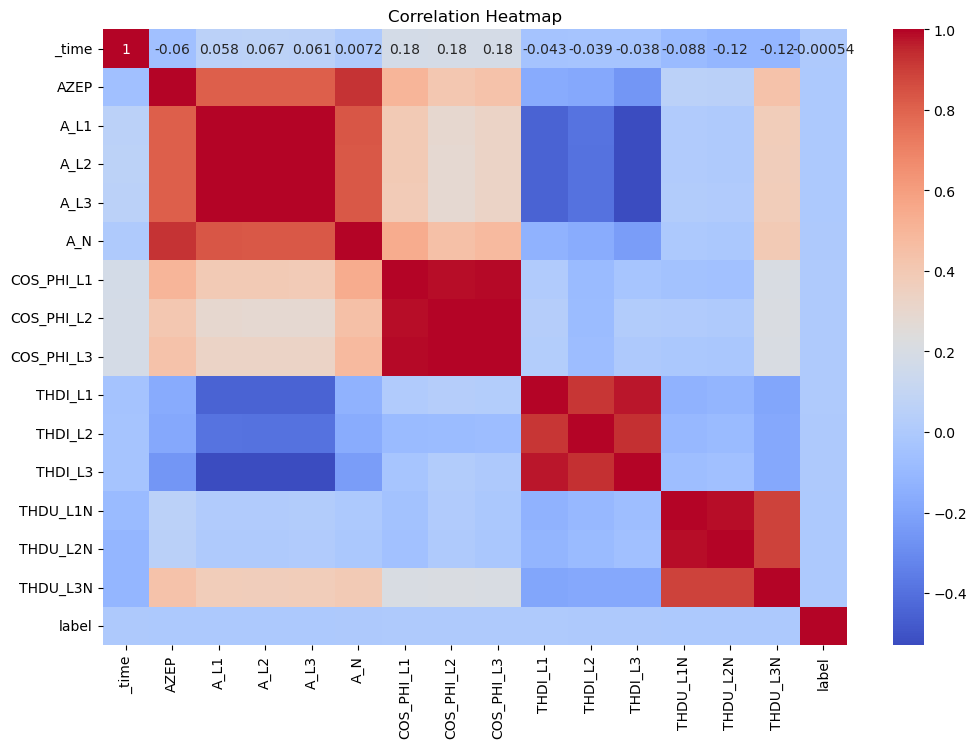

In [ ]:
# Compute the correlation matrix
correlation_matrix = df1_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
import plotly.express as px
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support as score, roc_curve
from sklearn.utils import compute_sample_weight
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')


Comment: After the correlation results we will know which features to exclude.

In [ ]:
# Select features and target variable
features = df1_data.drop(columns=[
    'label',
    '_time',
    'THDI_L2'
])
target = df1_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Using Balanced Random Forest
model = BalancedRandomForestClassifier(n_estimators=300, max_depth=7, sampling_strategy='auto')
model.fit(X_train_scaled, y_train)


BalancedRandomForestClassifier(max_depth=7, n_estimators=300,
                               sampling_strategy='auto')

In [ ]:
y_pred_brf = model.predict(X_test_scaled)

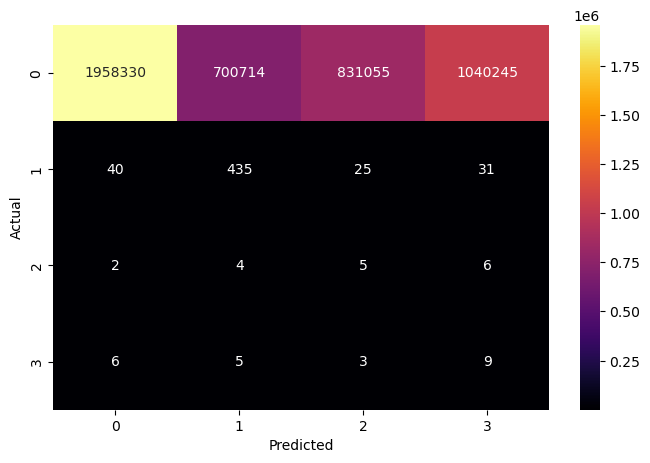

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_brf)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred_brf)
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: 0.009092937111136557


In [ ]:
precision = precision_score(y_test, y_pred_brf, average=None)
recall = recall_score(y_test, y_pred_brf, average=None)
f1 = f1_score(y_test, y_pred_brf, average=None)

print("Per-class scores:")
for i in range(len(precision)):
    print(f"Class {i}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1-score={f1[i]:.2f}")

Per-class scores:
Class 0: Precision=1.00, Recall=0.40, F1-score=0.57
Class 1: Precision=0.00, Recall=0.83, F1-score=0.00
Class 2: Precision=0.00, Recall=0.35, F1-score=0.00
Class 3: Precision=0.00, Recall=0.43, F1-score=0.00


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output (one-hot encode)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get probability predictions if you haven't already
y_pred_brf_proba = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_pred_brf_proba, multi_class='ovr', average=None)
print("Per-class scores:")
for i in range(len(roc_auc)):
    print(f"Class {i}: roc_auc={roc_auc[i]:.2f}")

Per-class scores:
Class 0: roc_auc=0.38
Class 1: roc_auc=0.55
Class 2: roc_auc=0.42
Class 3: roc_auc=0.48


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output (one-hot encode)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get probability predictions if you haven't already
y_pred_brf_proba = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_pred_brf_proba, multi_class='ovo', average=None)
print("Per-class scores:")
for i in range(len(roc_auc)):
    print(f"Class {i}: roc_auc={roc_auc[i]:.2f}")

Per-class scores:
Class 0: roc_auc=0.38
Class 1: roc_auc=0.55
Class 2: roc_auc=0.42
Class 3: roc_auc=0.48


In [ ]:
print("Number of unique classes in y_test:", len(np.unique(y_test)))
print("Shape of probability predictions:", y_pred_brf_proba.shape)

Number of unique classes in y_test: 4
Shape of probability predictions: (4530915, 2)


In [ ]:
# Example: Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score

# Get probability predictions if you haven't already
y_pred_brf_proba = model.predict_proba(X_test)

# Print classification report
print(classification_report(y_test, y_pred_brf))

# Calculate ROC-AUC score for multi-class
roc_auc = roc_auc_score(y_test, y_pred_brf_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


              precision    recall  f1-score   support

           0       1.00      0.43      0.60   4530344
           1       0.00      0.82      0.00       531
           2       0.00      0.29      0.00        17
           3       0.00      0.39      0.00        23

    accuracy                           0.43   4530915
   macro avg       0.25      0.48      0.15   4530915
weighted avg       1.00      0.43      0.60   4530915

ROC-AUC Score: 0.48378856772157275


In [ ]:
importances = model.feature_importances_
for i, v in enumerate(importances):
    print(f"Feature {i}: {v}")

Feature 0: 0.08638463110638459
Feature 1: 0.08444979134369886
Feature 2: 0.07745436588071786
Feature 3: 0.08348225210191564
Feature 4: 0.10187725497516267
Feature 5: 0.08000153560572143
Feature 6: 0.07279572885877844
Feature 7: 0.07346099944139961
Feature 8: 0.06277031080171262
Feature 9: 0.05990832042384564
Feature 10: 0.08066290114741345
Feature 11: 0.0688882643230107
Feature 12: 0.0678636439902386


In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns  # Get feature names from DataFrame

# Print feature importance with names
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

AZEP: 0.0864
A_L1: 0.0844
A_L2: 0.0775
A_L3: 0.0835
A_N: 0.1019
COS_PHI_L1: 0.0800
COS_PHI_L2: 0.0728
COS_PHI_L3: 0.0735
THDI_L1: 0.0628
THDI_L3: 0.0599
THDU_L1N: 0.0807
THDU_L2N: 0.0689
THDU_L3N: 0.0679


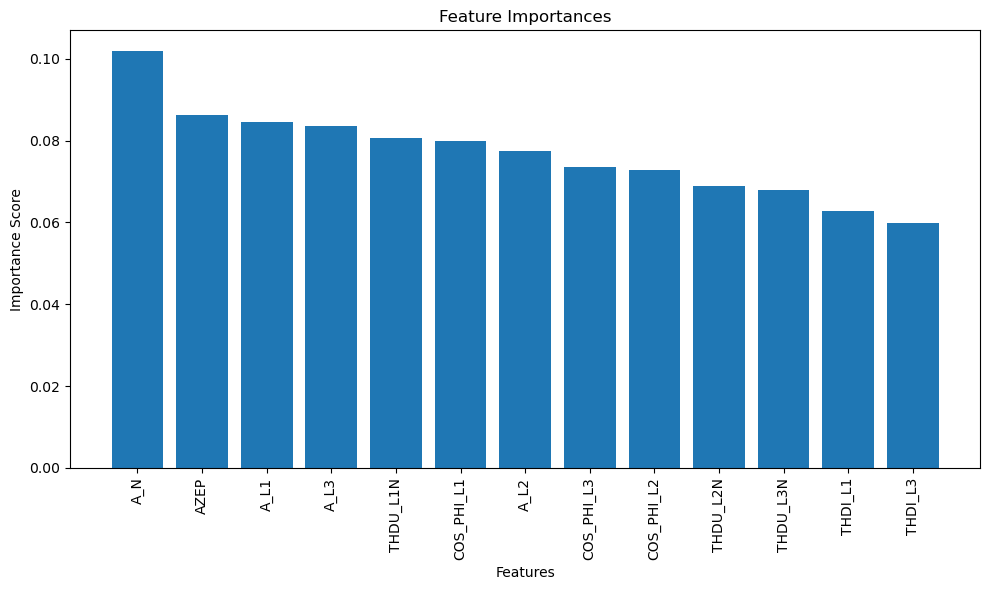

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming feature_names is a list or comes from your DataFrame
feature_names = X_train.columns  # For pandas DataFrame
importances = model.feature_importances_

# Sort feature importances and names
indices = np.argsort(importances)[::-1]  # Sort in descending order
sorted_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

Comment: Our model is correct as the high score is for neutral current and AZEP.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 7, 10],
    'sampling_strategy': ['auto', {0: 10000, 1: 1805, 2: 59, 3: 58}]
}

grid = GridSearchCV(
    estimator=BalancedRandomForestClassifier(),
    param_grid=param_grid,
    scoring='roc_auc_ovr',
    cv=5
)

grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 10, 'n_estimators': 500, 'sampling_strategy': 'auto'}


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500, 700, 1000],
    'max_depth': [5, 7, 10],
    'sampling_strategy': ['auto', {0: 10000, 1: 1805, 2: 59, 3: 58}]
}

grid = GridSearchCV(
    estimator=BalancedRandomForestClassifier(),
    param_grid=param_grid,
    scoring='roc_auc_ovr',
    cv=5
)

grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 7, 'n_estimators': 700, 'sampling_strategy': 'auto'}


In [ ]:
# Access the best model from GridSearchCV
best_model = grid.best_estimator_

# Make predictions on X_test
y_pred_bm = best_model.predict(X_test_scaled)

# If probabilities are needed (e.g., for ROC-AUC):
y_pred_proba = best_model.predict_proba(X_test_scaled)

# Example: Print predicted labels
#print("Predicted Labels:", y_pred_bm)

# Example: Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score

# Print classification report
print(classification_report(y_test, y_pred_bm))

# Calculate ROC-AUC score for multi-class
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


              precision    recall  f1-score   support

           0       1.00      0.44      0.61   4530344
           1       0.00      0.83      0.00       531
           2       0.00      0.35      0.00        17
           3       0.00      0.39      0.00        23

    accuracy                           0.44   4530915
   macro avg       0.25      0.50      0.15   4530915
weighted avg       1.00      0.44      0.61   4530915

ROC-AUC Score: 0.746029639074532


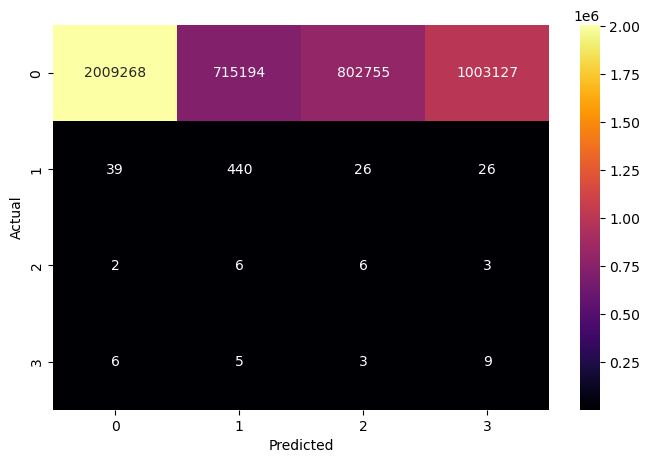

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_bm)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

# Using Easy Ensemble
model_eec = EasyEnsembleClassifier(n_estimators=300)
model_eec.fit(X_train_scaled, y_train)

# Make predictions on X_test
y_pred_eec = model_eec.predict(X_test_scaled)

In [ ]:

# If probabilities are needed (e.g., for ROC-AUC):
y_pred_eec_proba = model_eec.predict_proba(X_test_scaled)

# Example: Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score

# Print classification report
print(classification_report(y_test, y_pred_eec))

# Calculate ROC-AUC score for multi-class
roc_auc = roc_auc_score(y_test, y_pred_eec_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


              precision    recall  f1-score   support

           0       1.00      0.37      0.54   4530344
           1       0.00      0.80      0.00       531
           2       0.00      0.41      0.00        17
           3       0.00      0.30      0.00        23

    accuracy                           0.37   4530915
   macro avg       0.25      0.47      0.14   4530915
weighted avg       1.00      0.37      0.54   4530915

ROC-AUC Score: 0.7315082575576818


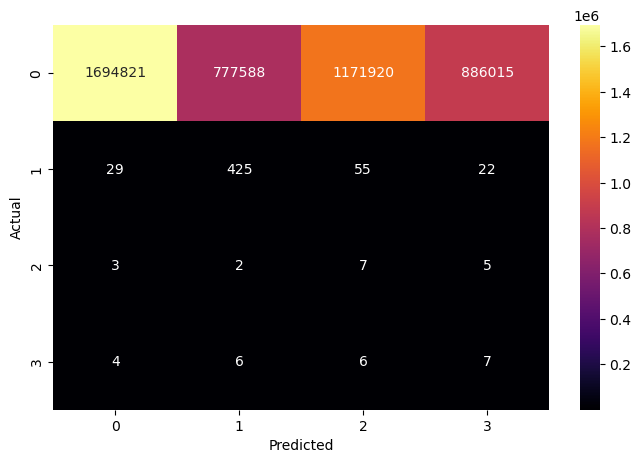

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_eec)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for EasyEnsembleClassifier
param_grid = {
    'n_estimators': [50, 100, 300, 500],  # Number of base estimators
    'sampling_strategy': ['auto'],  # Random state for reproducibility

    # Parameters for the base estimator (DecisionTreeClassifier)
    'estimator__max_depth': [5, 10, 15, None] # Max depth for the base estimator
}

# Initialize GridSearchCV with EasyEnsembleClassifier
grid_eec = GridSearchCV(
    estimator=EasyEnsembleClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc_ovr',  # Use AUC-ROC for multiclass classification
    cv=5             # Use all available CPU cores
)

# Fit the model
grid_eec.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Params:", grid_eec.best_params_)


In [ ]:
# Access the best model from GridSearchCV
best_model_eec = grid_eec.best_estimator_

# Make predictions on X_test
y_pred_bm_eec = best_model_eec.predict(X_test_scaled)

# If probabilities are needed (e.g., for ROC-AUC):
y_pred_proba_eec = best_model_eec.predict_proba(X_test_scaled)

# Example: Print predicted labels
print("Predicted Labels:", y_pred_bm_eec)

# Example: Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score

# Print classification report
print(classification_report(y_test, y_pred_bm_eec))

# Calculate ROC-AUC score for multi-class
roc_auc = roc_auc_score(y_test, y_pred_proba_eec, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_bm_eec)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

In [ ]:
df2_data=df_cleaned.fillna(0)

In [ ]:
df2_data['type'] = df2_data['type'].astype(str)

In [ ]:
# Define conditions and values
conditions = [
    df2_data['type'] == '0'
]
values = [0]
# Add the 'label' column
df2_data['label'] = np.select(conditions, values, default=1)

In [ ]:
df2_data.drop(columns='type', inplace=True)

In [ ]:
df2_data['label'].value_counts()

label
0    15101127
1        1922
Name: count, dtype: int64

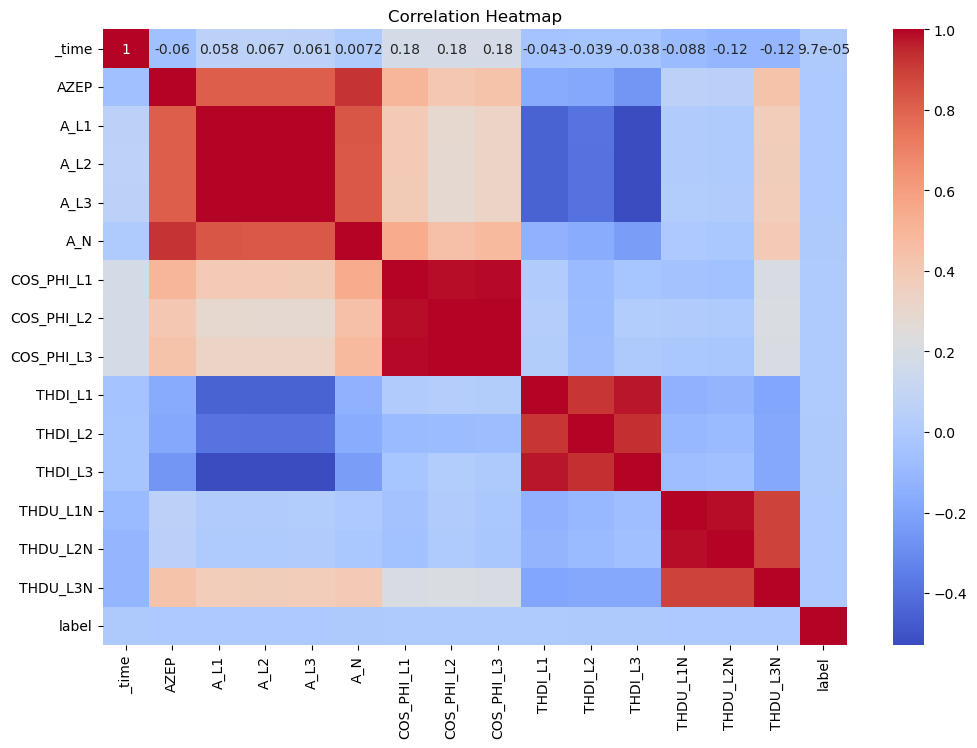

In [ ]:
# Compute the correlation matrix
correlation_matrix = df2_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Select features and target variable
features = df2_data.drop(columns=[
    'label',
    '_time',
    'THDI_L2'
])
target = df2_data['label']

# Split the data into training and testing sets
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled_df2 = scaler.fit_transform(X_train_df2)
X_test_scaled_df2 = scaler.transform(X_test_df2)

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Using Balanced Random Forest
model_df2 = BalancedRandomForestClassifier(n_estimators=300, max_depth=7, sampling_strategy='auto')
model_df2.fit(X_train_scaled_df2, y_train_df2)


BalancedRandomForestClassifier(max_depth=7, n_estimators=300,
                               sampling_strategy='auto')

In [ ]:
y_pred_brf_df2 = model_df2.predict(X_test_scaled_df2)

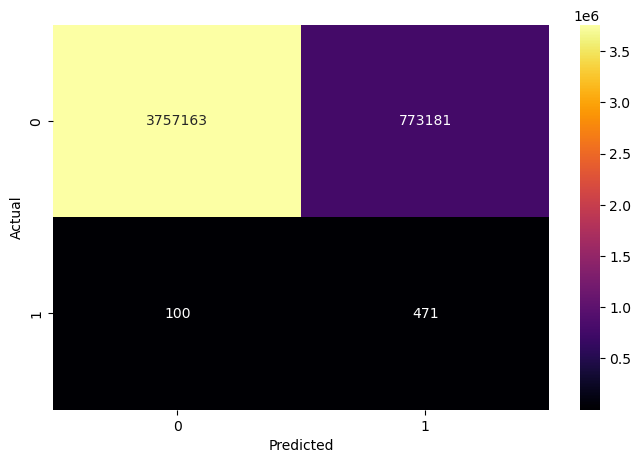

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_df2, y_pred_brf_df2)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test_df2), index=np.unique(y_test_df2))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test_df2, y_pred_brf_df2)
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: 0.01951580822731032


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true and y_pred are your true and predicted labels
precision = precision_score(y_test_df2, y_pred_brf_df2, average='weighted')
recall = recall_score(y_test_df2, y_pred_brf_df2, average='weighted')
f1 = f1_score(y_test_df2, y_pred_brf_df2, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 1.00
Recall: 0.83
F1-score: 0.91


In [ ]:
precision = precision_score(y_test_df2, y_pred_brf_df2, average=None)
recall = recall_score(y_test_df2, y_pred_brf_df2, average=None)
f1 = f1_score(y_test_df2, y_pred_brf_df2, average=None)

print("Per-class scores:")
for i in range(len(precision)):
    print(f"Class {i}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1-score={f1[i]:.2f}")

Per-class scores:
Class 0: Precision=1.00, Recall=0.83, F1-score=0.91
Class 1: Precision=0.00, Recall=0.82, F1-score=0.00


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc=roc_auc_score(y_test_df2, y_pred_brf_df2)

print(f"ROC_AUC: {roc_auc:.2f}")

ROC_AUC: 0.83


In [ ]:
# Print classification report
print(classification_report(y_test_df2, y_pred_brf_df2))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91   4530344
           1       0.00      0.82      0.00       571

    accuracy                           0.83   4530915
   macro avg       0.50      0.83      0.45   4530915
weighted avg       1.00      0.83      0.91   4530915



## Best model for df2

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the model
model = BalancedRandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [5, 7, 10],
    'sampling_strategy': ['auto', 0.5, 0.7]
}

# Perform GridSearchCV
grid_search_df2 = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search_df2.fit(X_train_scaled_df2, y_train_df2)

# Get the best model
best_model_df2 = grid_search_df2.best_estimator_
print("Best Parameters:", grid_search_df2.best_params_)

# Make predictions
y_pred_bm_df2 = best_model_df2.predict(X_test_scaled_df2)

Best Parameters: {'max_depth': 10, 'n_estimators': 700, 'sampling_strategy': 0.5}


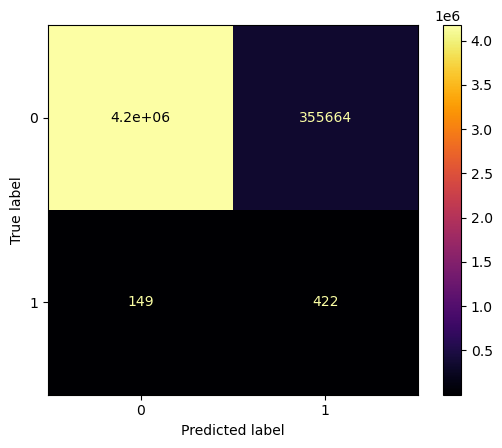

In [ ]:
# Evaluate the model
cm = confusion_matrix(y_test_df2, y_pred_bm_df2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_df2.classes_)
disp.plot(cmap='inferno', colorbar=True)
plt.show()


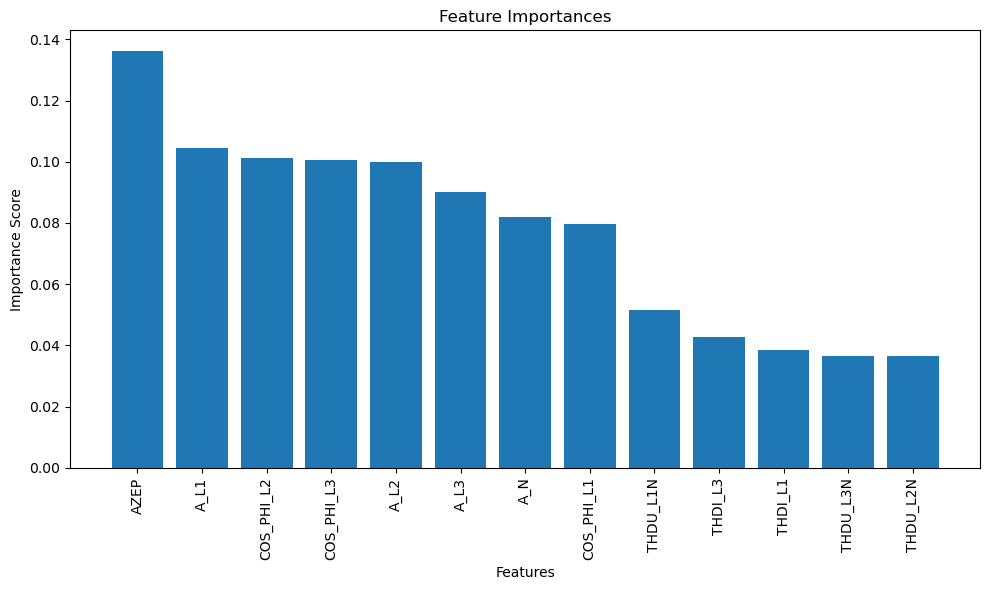

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming feature_names is a list or comes from your DataFrame
feature_names = X_train_df2.columns  # For pandas DataFrame
importances = best_model_df2.feature_importances_

# Sort feature importances and names
indices = np.argsort(importances)[::-1]  # Sort in descending order
sorted_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc=roc_auc_score(y_test_df2, y_pred_bm_df2)

print(f"ROC_AUC: {roc_auc:.2f}")

ROC_AUC: 0.83


In [ ]:
# Print classification report
print(classification_report(y_test_df2, y_pred_bm_df2))

NameError: name 'classification_report' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_df2, y_pred_bm_df2)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test_df2), index=np.unique(y_test_df2))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

# Using Easy Ensemble
model_eec_df2 = EasyEnsembleClassifier(n_estimators=300)
model_eec_df2.fit(X_train_scaled_df2, y_train_df2)

# Make predictions on X_test
y_pred_eec_df2 = model_eec_df2.predict(X_test_scaled_df2)

In [ ]:

# If probabilities are needed (e.g., for ROC-AUC):
y_pred_eec_proba_df2 = model_eec_df2.predict_proba(X_test_scaled_df2)

# Example: Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score

# Print classification report
print(classification_report(y_test_df2, y_pred_eec_df2))

# Calculate ROC-AUC score for multi-class
roc_auc = roc_auc_score(y_test_df2, y_pred_eec_proba_df2)
print("ROC-AUC Score:", roc_auc)


              precision    recall  f1-score   support

           0       1.00      0.80      0.89   4530344
           1       0.00      0.81      0.00       571

    accuracy                           0.80   4530915
   macro avg       0.50      0.81      0.45   4530915
weighted avg       1.00      0.80      0.89   4530915



ValueError: y should be a 1d array, got an array of shape (4530915, 2) instead.

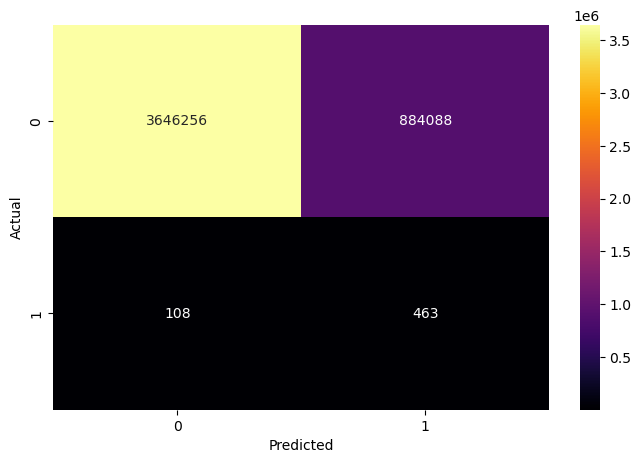

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_df2, y_pred_eec_df2)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test_df2), index=np.unique(y_test_df2))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc=roc_auc_score(y_test_df2, y_pred_eec_df2)

print(f"ROC_AUC: {roc_auc:.2f}")

ROC_AUC: 0.81


Comment: We tried Knn also, but due to time complexity, we have proceed further without it.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Define the kNN model
knn = KNeighborsClassifier()

# Define hyperparameters for tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='roc_auc_ovr')
grid_search_knn.fit(X_train_scaled, y_train)

# Best parameters
best_params_knn = grid_search_knn.best_params_
print("Best parameters for kNN:", best_params_knn)

# Evaluate the model on the test set
y_pred_knn = grid_search_knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

## New analysis

Comment: In the new analysis, we took enngineered data of datetime.

In [ ]:
df1_DateData = df1_data.copy()

In [ ]:
# Ensure the "_time" column is in datetime format
df1_DateData["_time"] = pd.to_datetime(df1_DateData["_time"])

# Add "Hour of the day" column
df1_DateData["Hour of the day"] = df1_DateData["_time"].dt.hour

# Add "Day of the week" column (Sunday=0, Saturday=6)
df1_DateData["Day of the week"] = df1_DateData["_time"].dt.dayofweek

# Output the updated DataFrame
df1_DateData.head()

,_time,AZEP,A_L1,A_L2,A_L3,A_N,COS_PHI_L1,COS_PHI_L2,COS_PHI_L3,THDI_L1,THDI_L2,THDI_L3,THDU_L1N,THDU_L2N,THDU_L3N,label,Hour of the day,Day of the week
0,2024-06-01 00:00:00,2.979002,17.218197,10.907660,14.621468,10.908293,0.581785,0.908385,0.772339,25.645781,23.738079,34.770809,1.888530,2.041828,1.789424,0,0,5
1,2024-06-01 00:00:01,2.921212,17.321022,11.325423,15.232433,11.264262,0.561046,0.898510,0.742731,26.202259,25.422169,35.870781,2.097183,2.243149,1.912607,0,0,5
2,2024-06-01 00:00:02,2.894955,17.321356,11.299232,15.152749,11.162358,0.564678,0.897204,0.744348,25.993792,24.752419,35.055126,2.073061,2.206912,1.916426,0,0,5
3,2024-06-01 00:00:03,2.917001,17.275156,11.261413,15.202518,11.231280,0.561376,0.898842,0.745958,26.017517,25.301424,36.023998,2.048936,2.181324,1.848700,0,0,5
4,2024-06-01 00:00:04,2.866067,17.092211,11.275751,15.010605,11.043076,0.567188,0.902105,0.751172,26.306911,25.913025,35.515816,2.184645,2.331969,1.981677,0,0,5


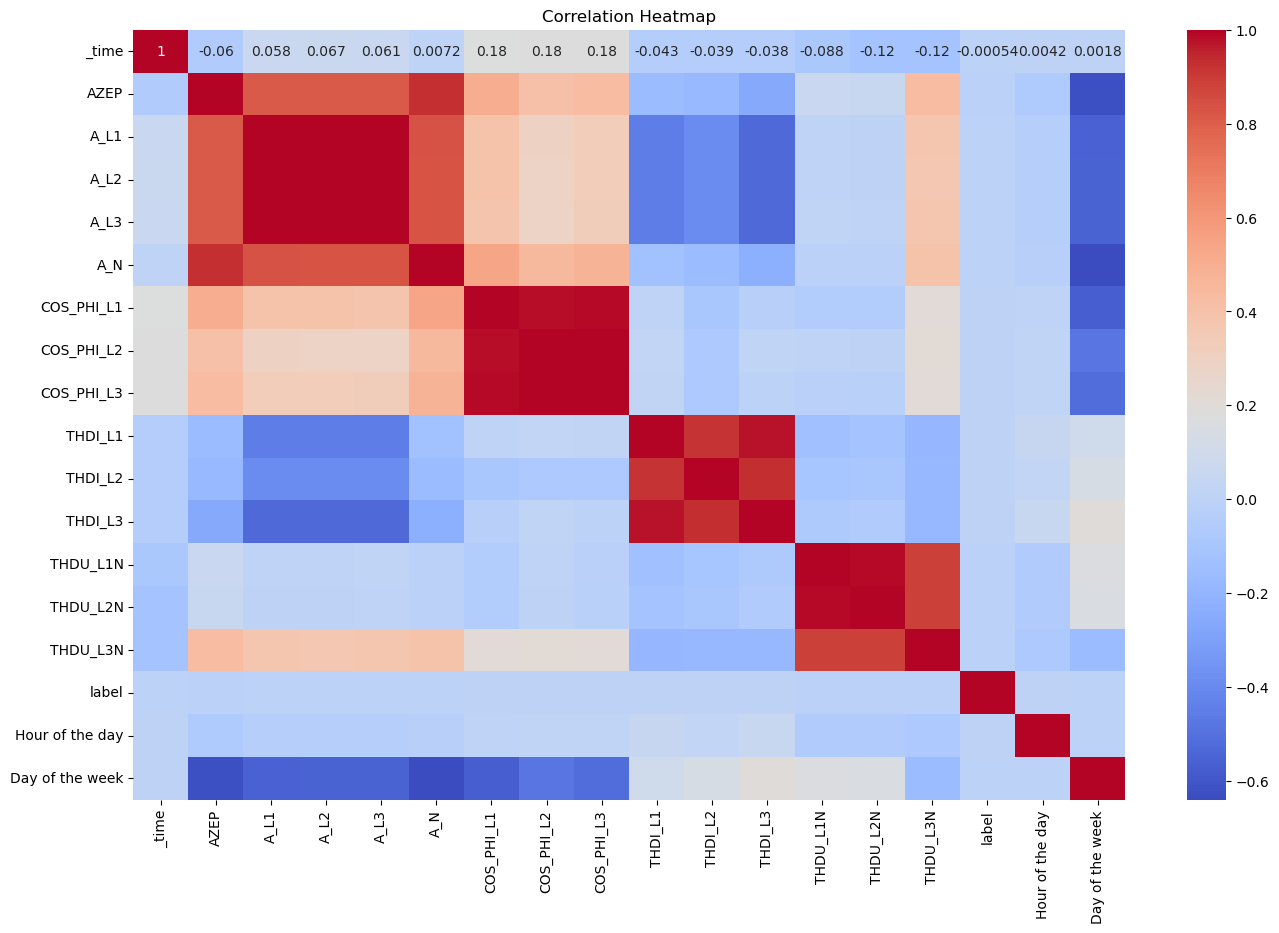

In [ ]:
# Compute the correlation matrix
correlation_matrix = df1_DateData.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Select features and target variable
features = df1_DateData.drop(columns=[
    'label',
    '_time',
    'THDI_L2'
])
target = df1_DateData['label']

# Split the data into training and testing sets
X_train_dt1, X_test_dt1, y_train_dt1, y_test_dt1 = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled_dt1 = scaler.fit_transform(X_train_dt1)
X_test_scaled_dt1 = scaler.transform(X_test_dt1)

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 7, 10],
    'sampling_strategy': ['auto', {0: 10000, 1: 1805, 2: 59, 3: 58}]
}
# We will use hyperparameters as per the situation.

grid = GridSearchCV(
    estimator=BalancedRandomForestClassifier(),
    param_grid=param_grid,
    scoring='roc_auc_ovr',
    cv=5
)

grid.fit(X_train_scaled_dt1, y_train_dt1)
print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 10, 'n_estimators': 500, 'sampling_strategy': 'auto'}


In [ ]:
# Access the best model from GridSearchCV
best_model_dt1 = grid.best_estimator_

# Make predictions on X_test
y_pred_bm_dt1 = best_model_dt1.predict(X_test_scaled_dt1)

# If probabilities are needed (e.g., for ROC-AUC):
y_pred_proba_dt1 = best_model_dt1.predict_proba(X_test_scaled_dt1)

# Example: Print predicted labels
print("Predicted Labels:", y_pred_bm_dt1)

# Example: Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score

# Print classification report
print(classification_report(y_test_dt1, y_pred_bm_dt1))

# Calculate ROC-AUC score for multi-class
roc_auc = roc_auc_score(y_test_dt1, y_pred_proba_dt1, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


Predicted Labels: [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.47      0.64   4530344
           1       0.00      0.84      0.00       531
           2       0.00      0.47      0.00        17
           3       0.00      0.39      0.00        23

    accuracy                           0.47   4530915
   macro avg       0.25      0.54      0.16   4530915
weighted avg       1.00      0.47      0.64   4530915

ROC-AUC Score: 0.7649003490854434


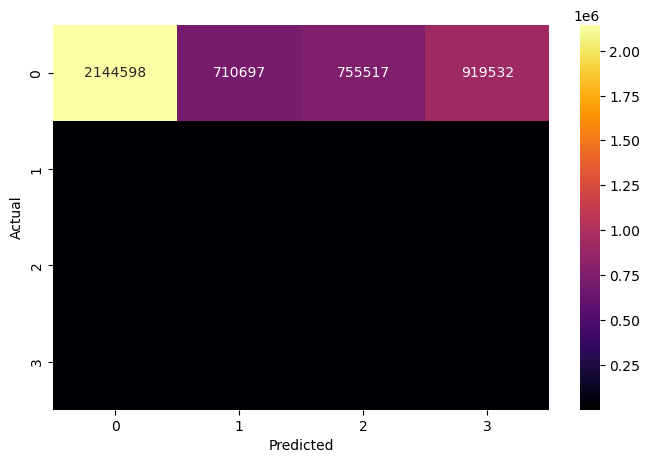

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_dt1, y_pred_bm_dt1)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test_dt1), index=np.unique(y_test_dt1))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

Comment: Checking further hyperparameters

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500, 700, 1000],
    'max_depth': [5, 7, 10],
    'sampling_strategy': ['auto', {0: 10000, 1: 1805, 2: 59, 3: 58}]
}

grid = GridSearchCV(
    estimator=BalancedRandomForestClassifier(),
    param_grid=param_grid,
    scoring='roc_auc_ovr',
    cv=5
)

grid.fit(X_train_scaled_dt1, y_train_dt1)
print("Best Params:", grid.best_params_)


In [ ]:
# Access the best model from GridSearchCV
best_model_dt1 = grid.best_estimator_

# Make predictions on X_test
y_pred_bm_dt1 = best_model_dt1.predict(X_test_scaled_dt1)

# If probabilities are needed (e.g., for ROC-AUC):
y_pred_proba_dt1 = best_model_dt1.predict_proba(X_test_scaled_dt1)

# Example: Print predicted labels
print("Predicted Labels:", y_pred_bm_dt1)

# Example: Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score

# Print classification report
print(classification_report(y_test_dt1, y_pred_bm_dt1))

# Calculate ROC-AUC score for multi-class
roc_auc = roc_auc_score(y_test_dt1, y_pred_proba_dt1, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_dt1, y_pred_bm_dt1)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test_dt1), index=np.unique(y_test_dt1))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

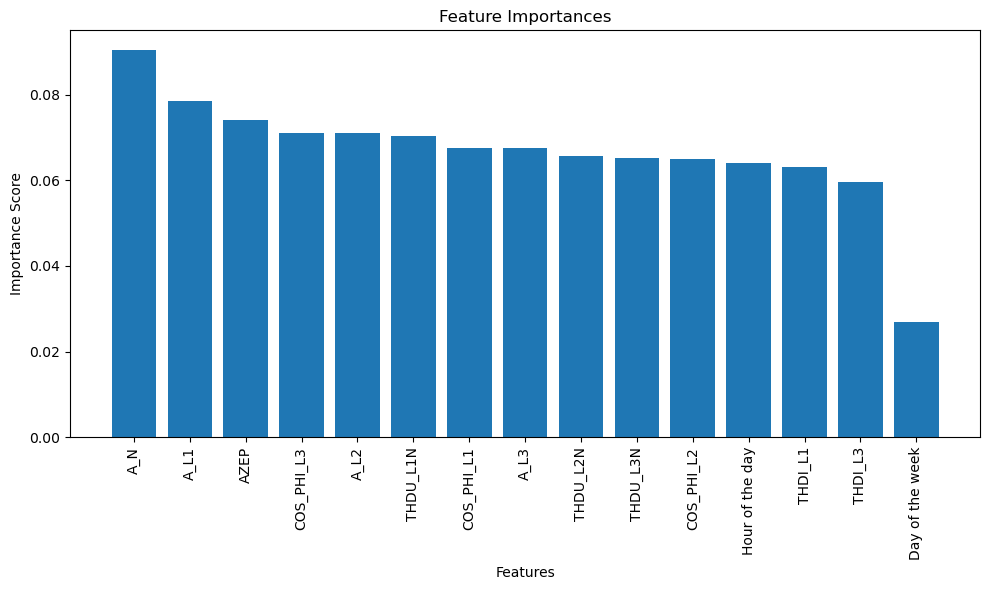

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming feature_names is a list or comes from your DataFrame
feature_names = X_train_dt1.columns  # For pandas DataFrame
importances = best_model_dt1.feature_importances_

# Sort feature importances and names
indices = np.argsort(importances)[::-1]  # Sort in descending order
sorted_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [ ]:
df2_DateData = df2_data.copy()

In [ ]:
# Ensure the "_time" column is in datetime format
df2_DateData["_time"] = pd.to_datetime(df2_DateData["_time"])

# Add "Hour of the day" column
df2_DateData["Hour of the day"] = df2_DateData["_time"].dt.hour

# Add "Day of the week" column (Sunday=0, Saturday=6)
df2_DateData["Day of the week"] = df2_DateData["_time"].dt.dayofweek

# Output the updated DataFrame
df2_DateData.head()

,_time,AZEP,A_L1,A_L2,A_L3,A_N,COS_PHI_L1,COS_PHI_L2,COS_PHI_L3,THDI_L1,THDI_L2,THDI_L3,THDU_L1N,THDU_L2N,THDU_L3N,label,Hour of the day,Day of the week
0,2024-06-01 00:00:00,2.979002,17.218197,10.907660,14.621468,10.908293,0.581785,0.908385,0.772339,25.645781,23.738079,34.770809,1.888530,2.041828,1.789424,0,0,5
1,2024-06-01 00:00:01,2.921212,17.321022,11.325423,15.232433,11.264262,0.561046,0.898510,0.742731,26.202259,25.422169,35.870781,2.097183,2.243149,1.912607,0,0,5
2,2024-06-01 00:00:02,2.894955,17.321356,11.299232,15.152749,11.162358,0.564678,0.897204,0.744348,25.993792,24.752419,35.055126,2.073061,2.206912,1.916426,0,0,5
3,2024-06-01 00:00:03,2.917001,17.275156,11.261413,15.202518,11.231280,0.561376,0.898842,0.745958,26.017517,25.301424,36.023998,2.048936,2.181324,1.848700,0,0,5
4,2024-06-01 00:00:04,2.866067,17.092211,11.275751,15.010605,11.043076,0.567188,0.902105,0.751172,26.306911,25.913025,35.515816,2.184645,2.331969,1.981677,0,0,5


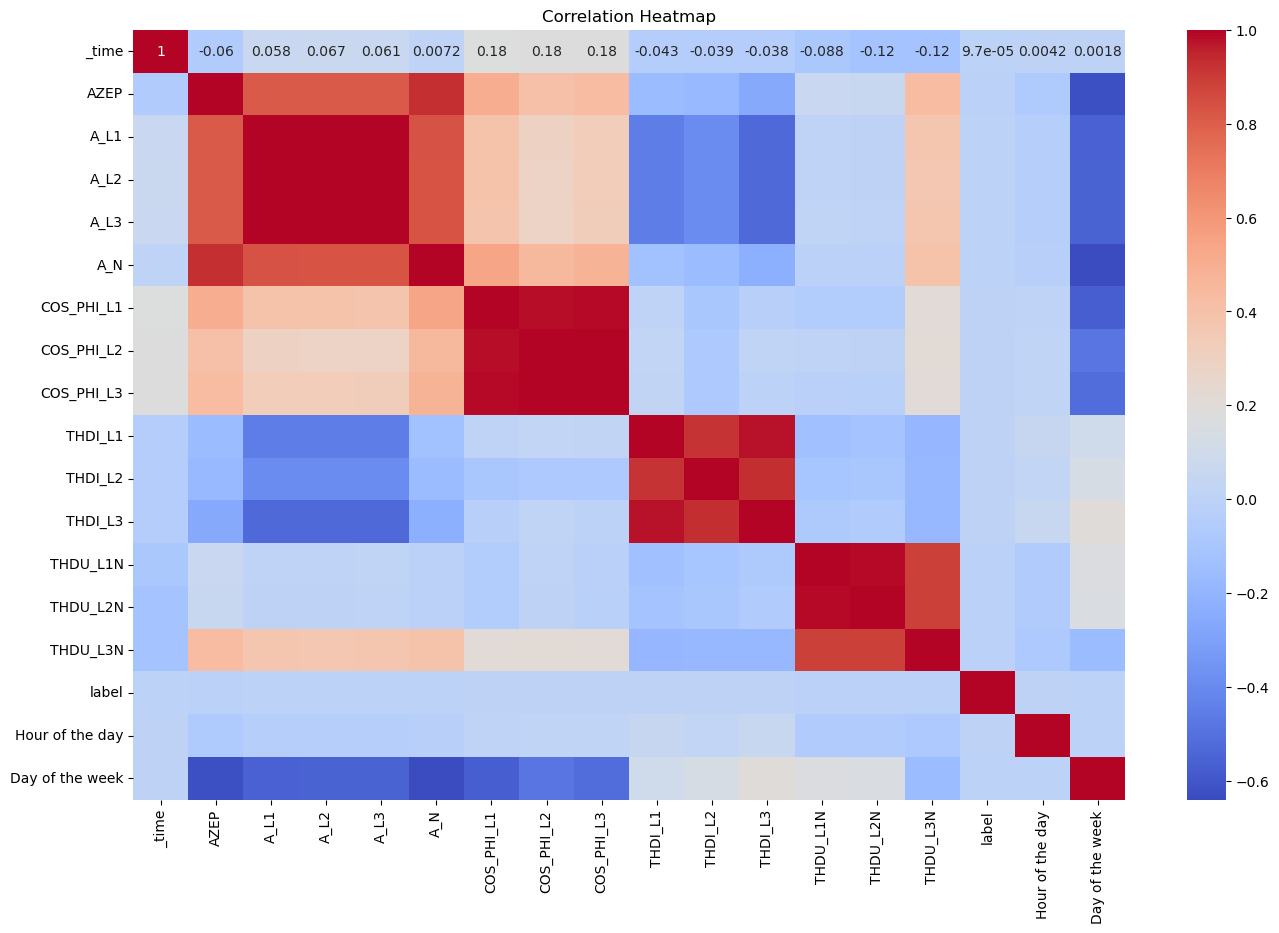

In [ ]:
# Compute the correlation matrix
correlation_matrix = df2_DateData.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Select features and target variable
features = df2_DateData.drop(columns=[
    'label',
    '_time',
    'THDI_L2'
])
target = df2_DateData['label']

# Split the data into training and testing sets
X_train_dt2, X_test_dt2, y_train_dt2, y_test_dt2 = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled_dt2 = scaler.fit_transform(X_train_dt2)
X_test_scaled_dt2 = scaler.transform(X_test_dt2)

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the model
model = BalancedRandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'sampling_strategy': ['auto', 0.5, 0.7]
}

# Perform GridSearchCV
grid_search_dt2 = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search_dt2.fit(X_train_scaled_dt2, y_train_dt2)

# Get the best model
best_model_dt2 = grid_search_dt2.best_estimator_
print("Best Parameters:", grid_search_dt2.best_params_)

# Make predictions
y_pred_bm_dt2 = best_model_dt2.predict(X_test_scaled_dt2)

In [ ]:
# Get the best model
best_model_dt2 = grid_search_dt2.best_estimator_
print("Best Parameters:", grid_search_dt2.best_params_)

# Make predictions
y_pred_bm_dt2 = best_model_dt2.predict(X_test_scaled_dt2)

In [ ]:
# Example: Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score

# Print classification report
print(classification_report(y_test_dt2, y_pred_bm_dt2))

# Calculate ROC-AUC score for multi-class
roc_auc = roc_auc_score(y_test_dt2, y_pred_bm_dt2)
print("ROC-AUC Score:", roc_auc)


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_dt2, y_pred_bm_dt2)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test_dt2), index=np.unique(y_test_dt2))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')
plt.show()

## Future work : Voltage forecasting

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Build LSTM model
def build_model(seq_length):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Generate synthetic profile
def generate_synthetic_profile(model, seed_sequence, length, scaler):
    # Flatten the seed sequence to 1D array
    synthetic_profile = list(seed_sequence.flatten())

    for _ in range(length):
        # Reshape the last sequence into the proper shape for prediction (1, seq_length, 1)
        x = np.array(synthetic_profile[-len(seed_sequence):]).reshape(1, len(seed_sequence), 1)
        next_value = model.predict(x)
        # Append the scalar value from the prediction
        synthetic_profile.append(next_value[0, 0])

    # Rescale back to the original range
    return scaler.inverse_transform(np.array(synthetic_profile).reshape(-1, 1))

def calculate_mse(original_data, synthetic_data):
    """
    Calculate Mean Squared Error between original and synthetic profiles.

    Parameters:
    original_data (numpy.ndarray): Original data profile
    synthetic_data (numpy.ndarray): Synthetic data profile

    Returns:
    float: Mean Squared Error
    """
    # Ensure both arrays have the same length
    min_length = min(len(original_data), len(synthetic_data))

    # Truncate both arrays to the same length
    original_data = original_data[:min_length]
    synthetic_data = synthetic_data[:min_length]

    # Calculate Mean Squared Error
    mse = np.mean((original_data - synthetic_data.flatten())**2)

    return mse

# Main function
def main():
    # Load data
    data = np.array(rec.analog[phase-1][start_time:stop_time])

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_normalized = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences
    seq_length = 24  # Use last 24 time steps to predict the next
    X, y = create_sequences(data_normalized, seq_length)

    # Reshape X to be [samples, time steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Build and train model
    model = build_model(seq_length)
    model.fit(X, y, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

    # Generate synthetic profile
    seed_sequence = data_normalized[:seq_length]
    synthetic_profile = generate_synthetic_profile(model, seed_sequence, 1000, scaler)

    # Plot original and synthetic profiles
    plt.figure(figsize=(12, 6))
    plt.plot(data[:1000], label='Original Profile')
    plt.plot(synthetic_profile, label='Synthetic Profile')
    plt.legend()
    plt.title('Original vs Synthetic Voltage Profile')
    plt.xlabel('Time Step')
    plt.ylabel('Voltage')
    plt.show()

    # Calculate MSE
    mse = calculate_mse(data[:1000], synthetic_profile)
    print(f"Mean Squared Error: {mse}")

if __name__ == '__main__':
    main()

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.1177 - val_loss: 0.0040
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0025 - val_loss: 2.8793e-04
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.4666e-04 - val_loss: 6.4322e-05
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.5600e-05 - val_loss: 5.2595e-05
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.9695e-05 - val_loss: 3.6059e-05
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.0134e-05 - val_loss: 3.0198e-05
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.7958e-05 - val_loss: 1.4343e-04
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.8236e-05 - val_loss: 5.5505e-05
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3492e-05 - val_loss: 2.4886e-05
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 3.7513e-05 - val_loss: 5.8405e-05
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 5.2761e-05 - val_los

Comment: The forecasting can be improved by increasing the number of epochs.